<a href="https://colab.research.google.com/github/Rasyid-Renaldi/TuBes-PCVK-kelompok11/blob/main/finalProject-carPark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
from google.colab.patches import cv2_imshow

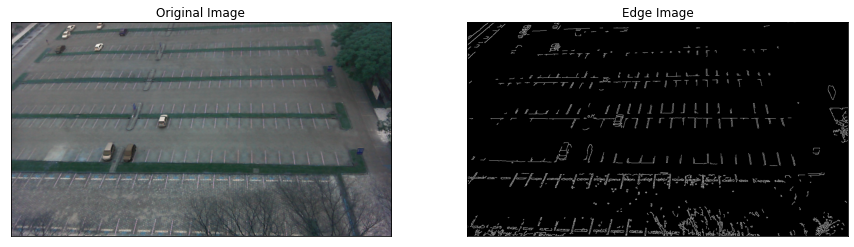

In [23]:
img = cv.imread('/content/drive/MyDrive/PCVK/Final-Proj/Car Park/2012-09-16_07_57_59.jpg', cv.IMREAD_COLOR)
edges = cv.Canny(img,100,200)
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

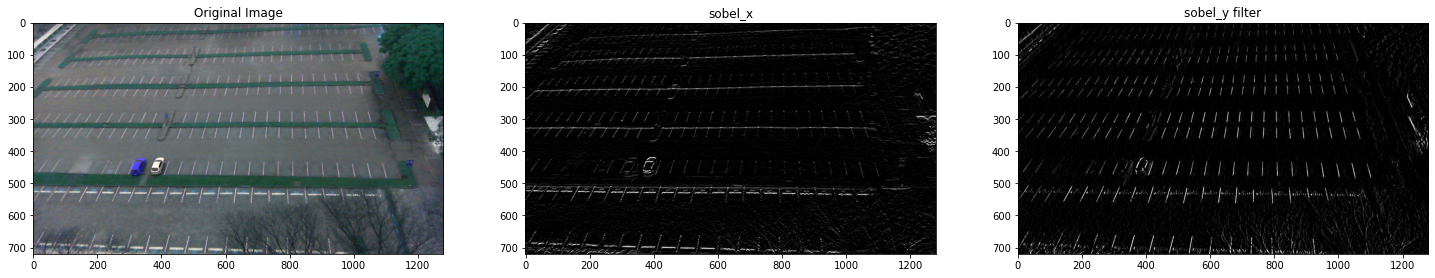

In [25]:
img = cv.imread('/content/drive/MyDrive/PCVK/Final-Proj/Car Park/2012-09-21_06_20_11.jpg',cv.IMREAD_COLOR)

image_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

filtered_image_y = cv.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv.filter2D(image_gray, -1, sobel_x)

(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(25, 25))
ax1.title.set_text('Original Image')
ax1.imshow(img)
ax2.title.set_text('sobel_x')
ax2.imshow(filtered_image_y, cmap='gray')
ax3.title.set_text('sobel_y filter')
ax3.imshow(filtered_image_x, cmap='gray')

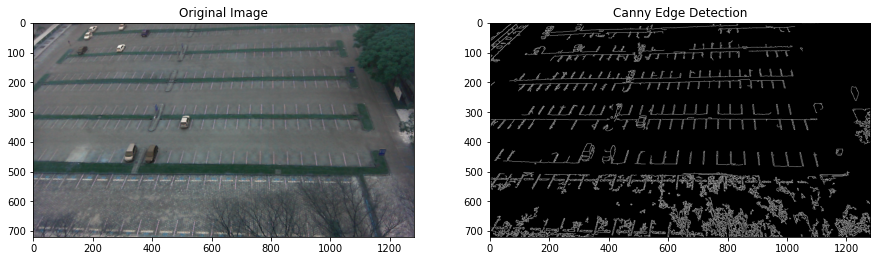

In [24]:
image_gray = cv.cvtColor(img, cv.IMREAD_COLOR)
filtered_image = cv.Canny(image_gray, threshold1=20, threshold2=200)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img)
ax2.title.set_text('Canny Edge Detection')
ax2.imshow(filtered_image, cmap='gray')

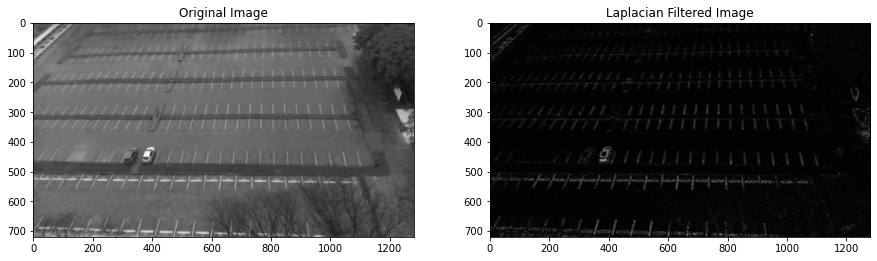

In [27]:
image_gray = cv.cvtColor(img, cv.IMREAD_COLOR)

img = cv.GaussianBlur(image_gray,(3,3),0)

filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

filtered_image = cv.convertScaleAbs(filtered_image)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

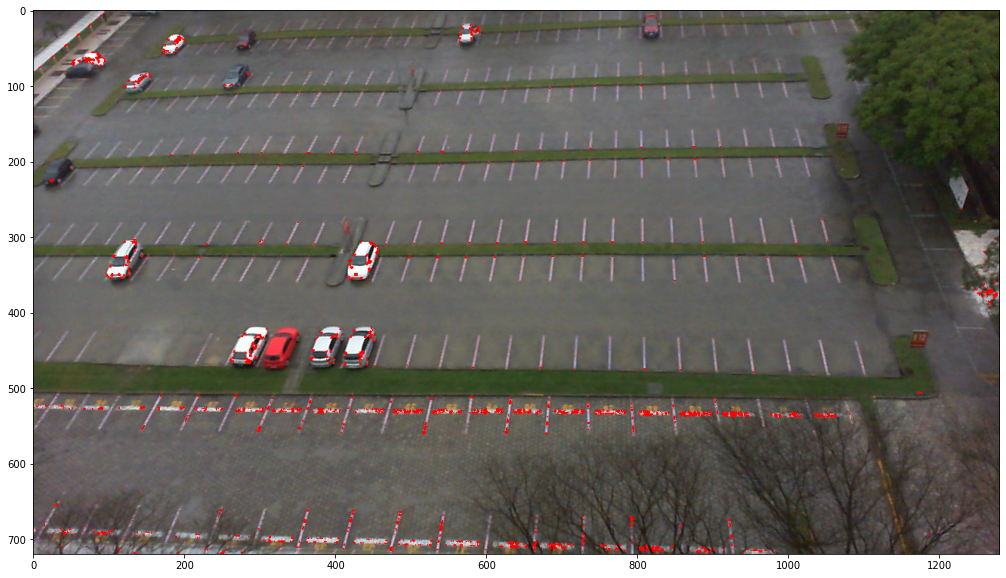

In [28]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Final-Proj/Car Park/2012-09-21_07_00_12.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)

harris_output = cv.dilate(harris_output, None)

input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

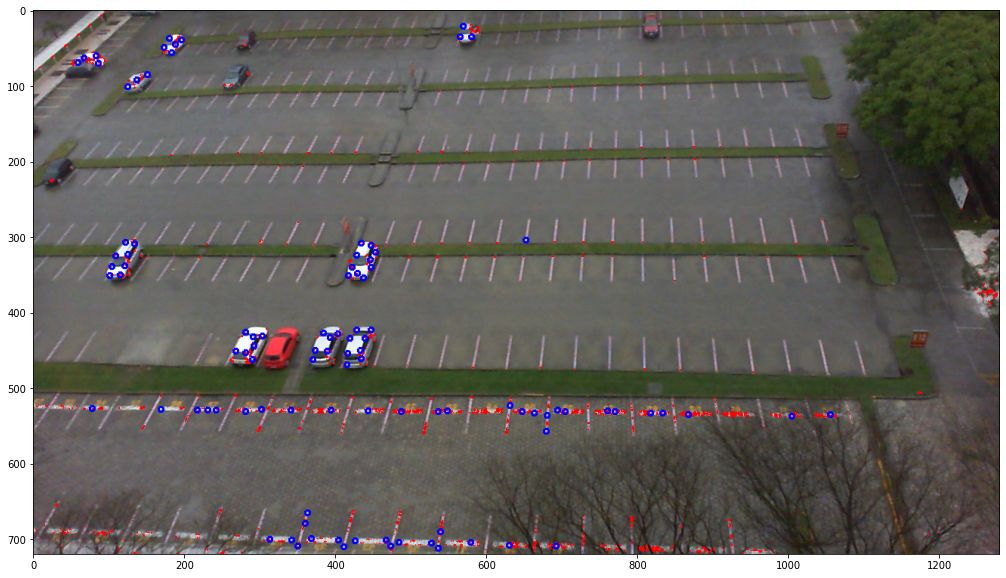

In [34]:
img = cv.imread('/content/drive/MyDrive/PCVK/Final-Proj/Car Park/2012-09-21_07_00_12.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))